In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Load Query images and coordinates

In [2]:
# load query images and covert BGR -> RGB

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return images

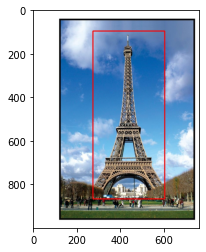

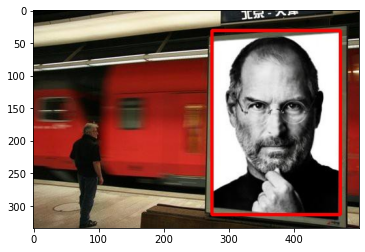

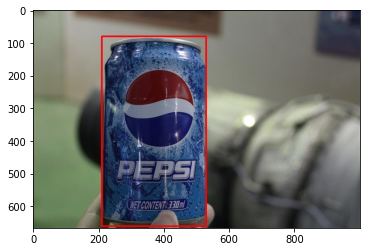

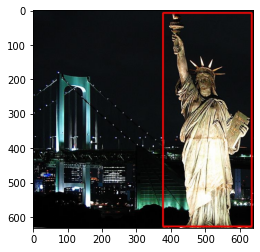

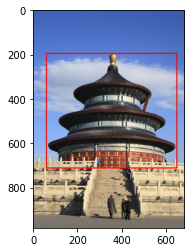

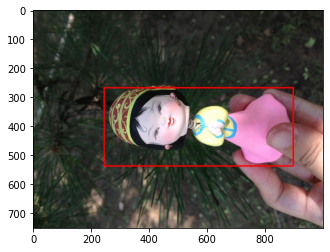

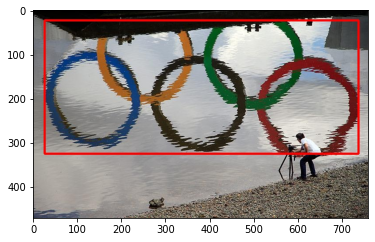

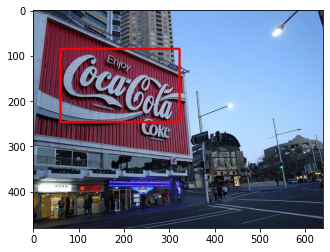

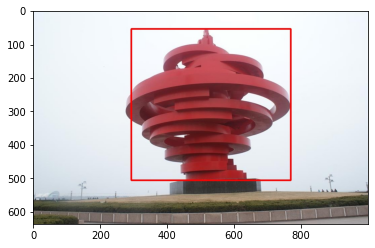

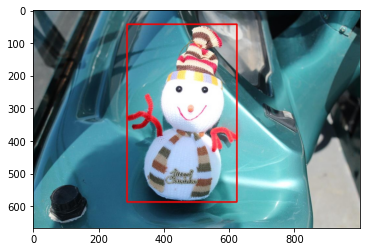

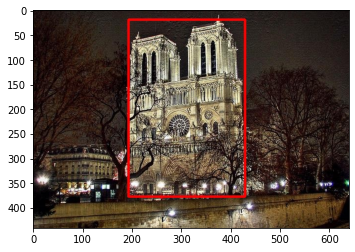

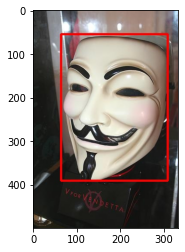

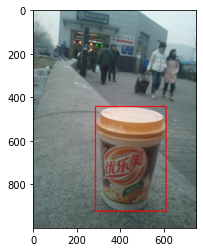

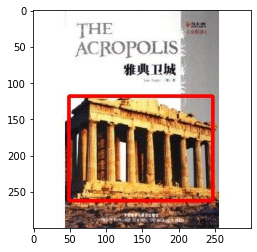

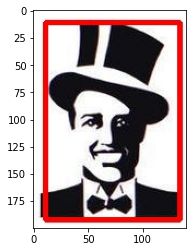

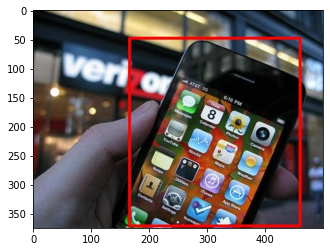

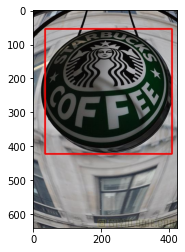

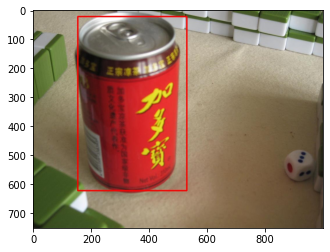

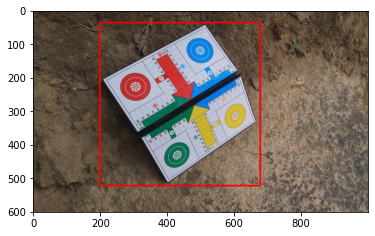

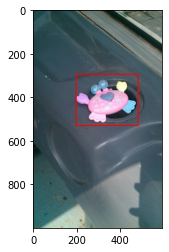

In [3]:
query_images = load_images_from_folder("Queries")

for i in range(len(query_images)):
    plt.imshow(query_images[i])
    plt.show()

In [4]:
# load query coordinates, and transform them to list of integers

def get_coords(path):
    with open(path,'r') as f:
        a = f.read().splitlines()
        return [int(c) for c in str(a[0]).split()]

In [5]:
coords_queries_files = glob.glob("Queries/*.txt")
coords_queries = []
for i in range(len(coords_queries_files)):
    coords_queries.append(get_coords(coords_queries_files[i]))
coords_queries

[[275, 96, 330, 770],
 [274, 31, 197, 282],
 [210, 80, 319, 580],
 [376, 8, 257, 619],
 [60, 195, 586, 516],
 [245, 267, 652, 269],
 [26, 23, 712, 302],
 [60, 85, 263, 161],
 [293, 53, 476, 452],
 [287, 43, 336, 543],
 [193, 19, 236, 358],
 [64, 55, 245, 336],
 [285, 442, 323, 480],
 [49, 118, 198, 144],
 [11, 11, 123, 181],
 [166, 48, 294, 323],
 [35, 55, 372, 367],
 [154, 22, 376, 599],
 [199, 37, 479, 485],
 [198, 294, 285, 235]]

In [6]:
# crop image according to coordinate, saved in cropped_imgs

def crop_by_coords(img, coord):
    new_img = img[coord[1]:coord[1]+coord[3],coord[0]:coord[0]+coord[2]]
    return new_img

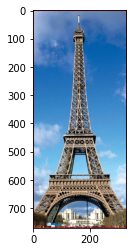

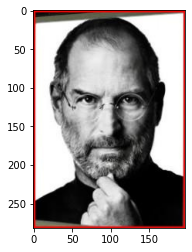

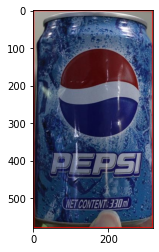

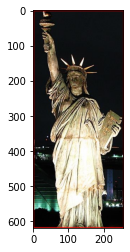

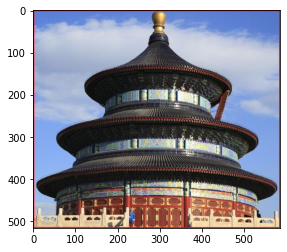

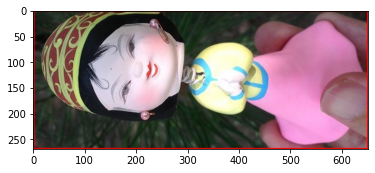

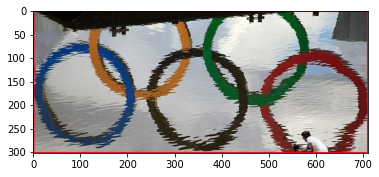

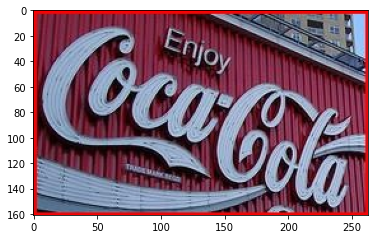

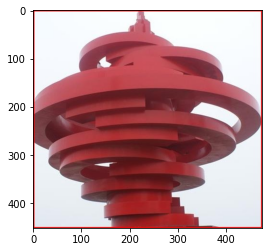

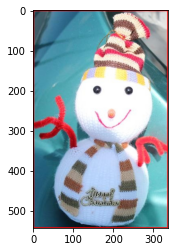

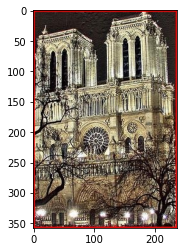

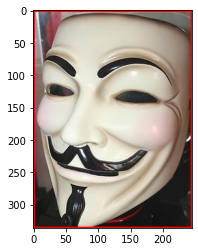

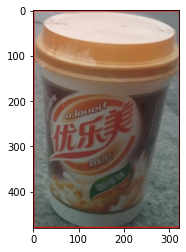

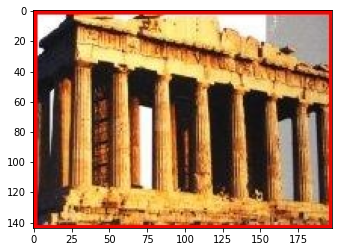

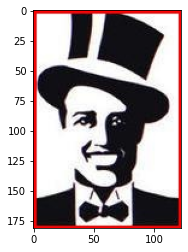

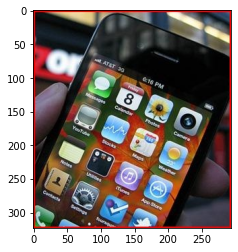

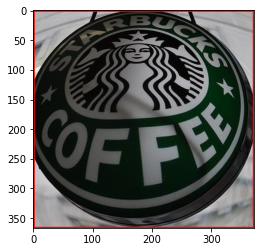

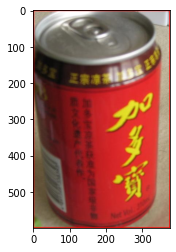

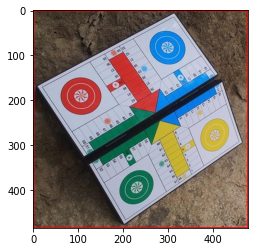

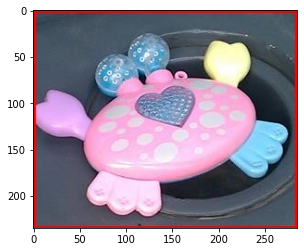

In [7]:
cropped_queries = []

for i in range(len(query_images)):
    cropped_queries.append(crop_by_coords(query_images[i], coords_queries[i]))

for i in range(len(cropped_queries)):
    plt.imshow(cropped_queries[i])
    plt.show()

# Load Images and coordinates

In [8]:
images = load_images_from_folder("Images")
print(len(images))

5000


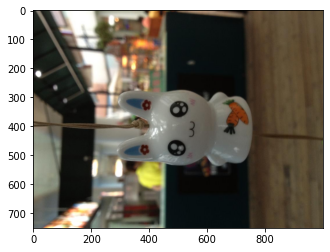

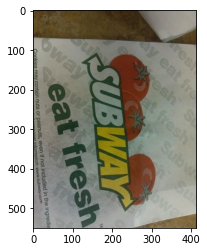

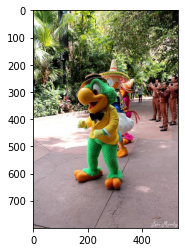

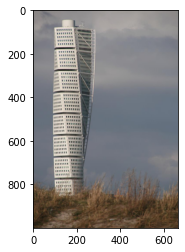

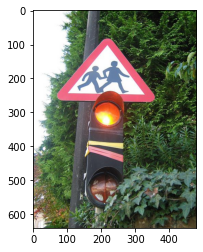

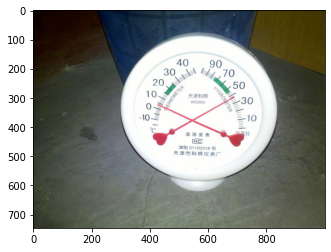

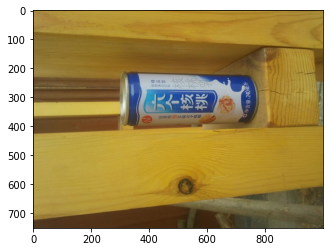

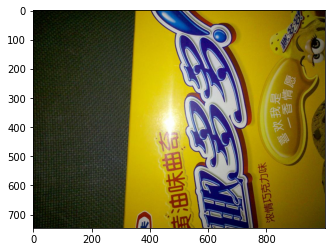

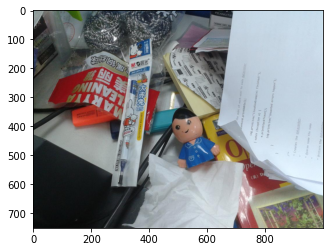

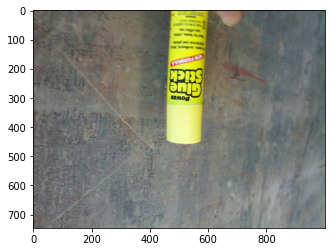

In [9]:
for i in range(10):
    plt.imshow(images[i])
    plt.show()

In [10]:
image_coords_path = glob.glob("Images/*.txt")
image_coords = []
for i in range(len(image_coords_path)):
    image_coords.append(get_coords(image_coords_path[i]))
print(len(image_coords))

2000


Last image with coords.


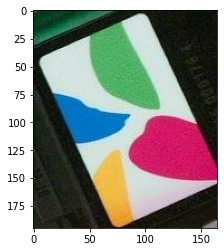

In [11]:
# images with coords

cropped_images = []

for i in range(len(image_coords)):
    cropped_images.append(crop_by_coords(images[i], image_coords[i]))

print("Last image with coords.")
plt.imshow(cropped_images[-1])
plt.show()

In [12]:
# image_all saves images with coords + images without coords
image_all = []
image_all = cropped_images.copy()
image_all = image_all + images[2000:]
print(len(image_all))

5000


# Hist compare

In [20]:
import cv2
from scipy.spatial import distance

def calculate_hist(query, image):
    hist_base = cv2.calcHist([query], [0, 1, 2], None, [32, 32, 32], [0, 256, 0, 256, 0, 256])
    hist_base = cv2.normalize(hist_base, hist_base).flatten()
    hist_test1 = cv2.calcHist([image], [0, 1, 2], None, [32, 32, 32], [0, 256, 0, 256, 0, 256])
    hist_test1 = cv2.normalize(hist_test1, hist_test1).flatten()
    
    result = cv2.compareHist(hist_base, hist_test1, cv2.HISTCMP_INTERSECT)

    return result

In [21]:
result = []

for i in range(20):
    hist_arr = []
    question = "Q"+str(i+1)+":"
    new_hist = []
    for j in range(len(image_all)):
        hist_arr.append([calculate_hist(cropped_queries[i], image_all[j]), j+1])
    hist_arr.sort(reverse=True)
    
    print(i)
    img_num = [str(group[1]) for group in hist_arr]
    
    new_hist.append(question)
    new_hist = new_hist + img_num
    result.append(new_hist)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [22]:
len(result)

20

In [23]:
with open('examples/example_result/rankList_hist_example_query_intersect_RGB_final.txt', 'w') as f:
    for i in range(20):
        for listitem in result[i]:
            f.write('%s ' % listitem)
        f.write('\n')

In [24]:
image_grid = []

for i in range(20):
    for j in range(20):
        image_grid.append(result[i][j+1])

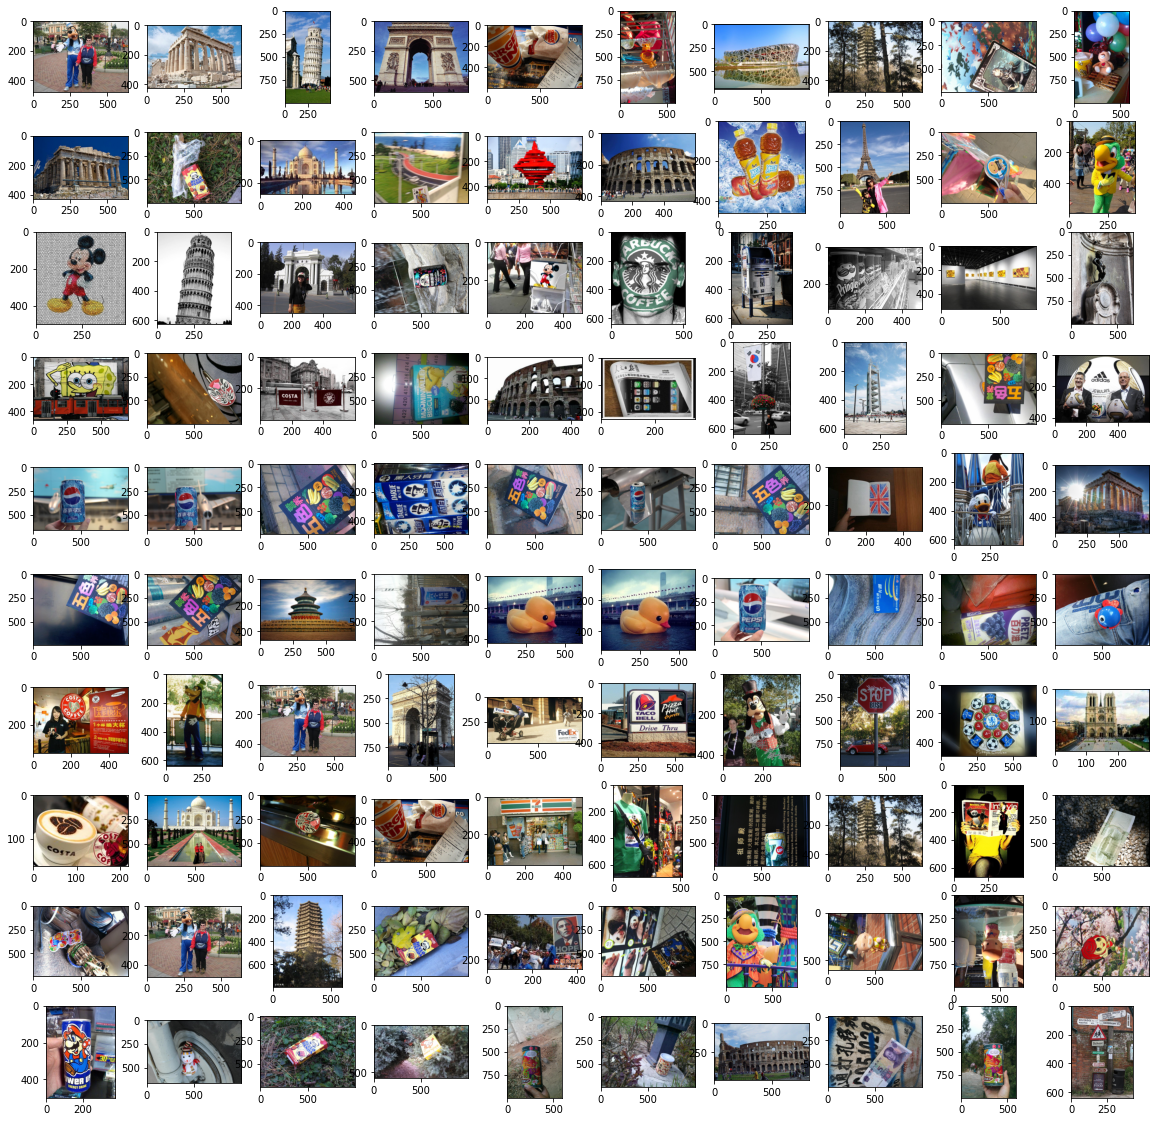

In [25]:
import numpy as np
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 10
rows = 10

# for i in range(10):
for j in range(1, columns*rows +1):
    img = images[int(image_grid[j-1])-1]
    fig.add_subplot(rows, columns, j)
    plt.imshow(img)
plt.show()